In [4]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
hotels = pd.read_excel('data/HotelCustomersDataset.xlsx')

In [14]:
hotels['date'] = (pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit = 'D')).astype('datetime64[ns]')

# Assignment 1

In [17]:
daily_revenue = (hotels
                 .groupby('date')
                 .agg(
                    LodgingRevenue = pd.NamedAgg('LodgingRevenue', 'sum'),
                    OtherRevenue = pd.NamedAgg('OtherRevenue', 'sum')
                 )
                 )
monthly_revenue = daily_revenue.resample('M').sum()

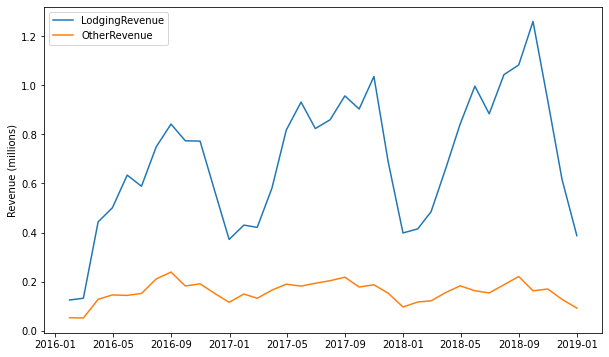

In [21]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_ylabel('Revenue (millions)')


ax.legend(monthly_revenue.columns)

plt.show()

# Assignment  2

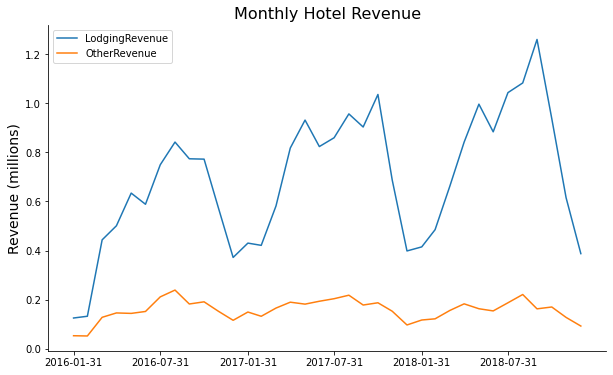

In [25]:
fig, ax = plt.subplots(figsize = (10 ,6))

ax.plot(monthly_revenue.index, monthly_revenue['LodgingRevenue'] / 1_000_000)
ax.plot(monthly_revenue.index, monthly_revenue['OtherRevenue'] / 1_000_000)

ax.set_title('Monthly Hotel Revenue', fontsize = 16)
ax.set_ylabel('Revenue (millions)', fontsize = 14)

ax.set_xticks(monthly_revenue.index[::6])

ax.legend(monthly_revenue.columns)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()